In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("training_data.csv")

In [3]:
training_data.head(5)

,favorite_count,full_text,hashtags,retweet_count,year,dim1_nominate,dim2_nominate
0,8,b'WATCH my speech on the @SenateFloor to learn...,PatientFreedomAct,3,2017,0.243962,0.170366
1,2,b'Boehner delays leadership races. Only speake...,rossformajoritywhip,3,2015,0.561728,0.089540
2,5,"b""I'll be sharing #scarynumbers about #governm...",scarynumbers governmentspending,4,2014,0.513246,-0.224541
3,34,"b""#OTD in '64, LBJ took important step towards...",OTD,14,2017,-0.241932,0.097843
4,23,b'My bipartisan bill is a step toward protecti...,VA07,7,2020,-0.225722,0.329999


Section A : part a)

In [4]:
df_training = pd.DataFrame(data=training_data)
df_training['text_char_len'] = df_training['full_text'].apply(lambda x: len(x)-3)

for i in range(len(df_training)):
    words = df_training.loc[i, 'full_text'].split()
    if words[0] == "b'": words.pop(0)
    if words[:-1] == "'": words.pop()

    df_training.loc[i, 'text_word_len'] = len(words)

In [5]:
df_training['hashtags']

0                       PatientFreedomAct
1                     rossformajoritywhip
2         scarynumbers governmentspending
3                                     OTD
4                                    VA07
                       ...               
333982               ExpandSocialSecurity
333983                       actonclimate
333984                            climate
333985                       TeleTownHall
333986                  MissouriSpotlight
Name: hashtags, Length: 333987, dtype: object

In [6]:
df_training['hash_char_len'] = df_training['hashtags'].apply(lambda x: len(''.join(x.split())))
df_training['hash_word_len'] = df_training['hashtags'].apply(lambda x: len(x.split()))

In [7]:
stats = {
    'text' : {
        'char' : {
                'mini' : df_training['text_char_len'].min(),
                'avg' : df_training['text_char_len'].mean(),
                'med' : df_training['text_char_len'].median(),
                'maxi' : df_training['text_char_len'].max()
        },
        'word' : {
                'mini' : df_training['text_word_len'].min(),
                'avg' : df_training['text_word_len'].mean(),
                'med' : df_training['text_word_len'].median(),
                'maxi' : df_training['text_word_len'].max()
        }
    },
    'hashtag' : {
        'char' : {
                'mini' : df_training['hash_char_len'].min(),
                'avg' : df_training['hash_char_len'].mean(),
                'med' : df_training['hash_char_len'].median(),
                'maxi' : df_training['hash_char_len'].max()
        },
        'word' : {
                'mini' : df_training['hash_word_len'].min(),
                'avg' : df_training['hash_word_len'].mean(),
                'med' : df_training['hash_word_len'].median(),
                'maxi' : df_training['hash_word_len'].max()
        }
    }
}

stats

{'text': {'char': {'mini': 4,
   'avg': 180.17613859222067,
   'med': 151.0,
   'maxi': 2434},
  'word': {'mini': 1.0, 'avg': 24.885510513882277, 'med': 21.0, 'maxi': 61.0}},
 'hashtag': {'char': {'mini': 1,
   'avg': 14.044142436681668,
   'med': 12.0,
   'maxi': 168},
  'word': {'mini': 1, 'avg': 1.4919802267752937, 'med': 1.0, 'maxi': 17}}}

In [8]:
stats_table = pd.DataFrame(columns = ["#char_text", "#word_text","#char_hashtag","#word_hashtag"], index =["Min","Avg","Med","Max"])

In [9]:
for metric, content in stats.items():
    for length_type, value in content.items():
        for stat, magnitude in value.items():
            index_map = {
                'mini' : 'Min',
                'avg' :'Avg',
                'med' : 'Med',
                'maxi' : 'Max'
            }
            column = f"#{length_type}_{metric}"
            index = index_map[stat]
            
            stats_table.loc[index,column] = magnitude
            
stats_table

,#char_text,#word_text,#char_hashtag,#word_hashtag
Min,4,1.0,1,1
Avg,180.176139,24.885511,14.044142,1.49198
Med,151.0,21.0,12.0,1.0
Max,2434,61.0,168,17


Section A : part b)

In [10]:
hashtags = {}

for i in range(len(df_training)):
    tags = df_training.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags[tag] = hashtags.get(tag, 1) + 1

sorted_hashtags_desc = dict(sorted(hashtags.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags = list(sorted_hashtags_desc.keys())[0:10]

top_10_hashtags

['COVID19',
 'tcot',
 'SOTU',
 'Obamacare',
 'utpol',
 'coronavirus',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 '4jobs']

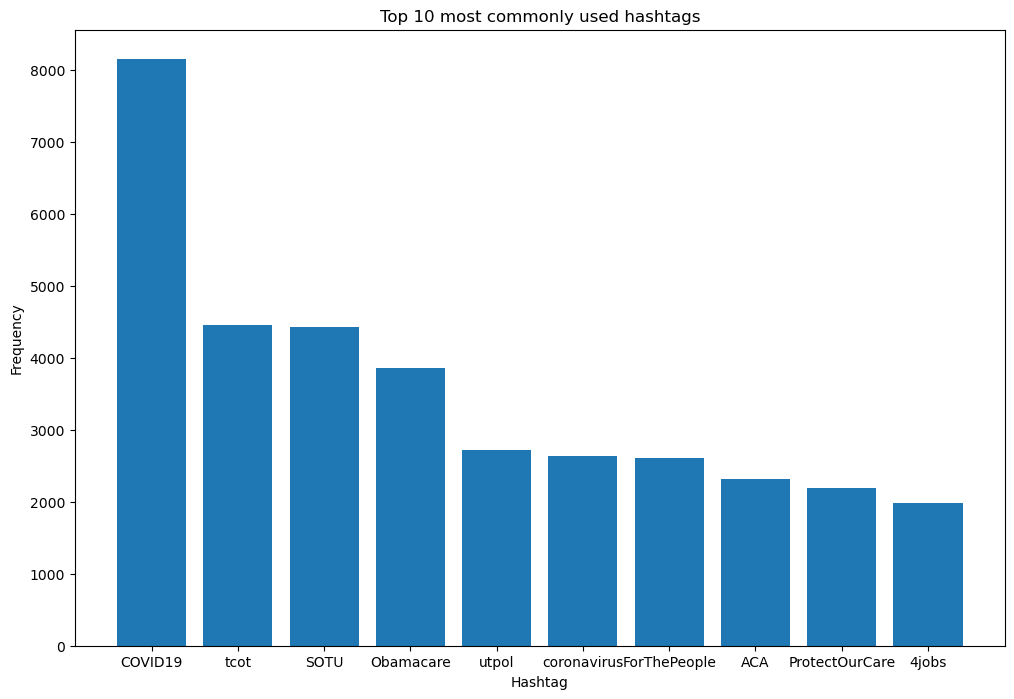

In [11]:
plt.figure(figsize = (12,8))
plt.bar(top_10_hashtags, list(sorted_hashtags_desc.values())[0:10])
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 most commonly used hashtags')
plt.show()

Do you observe any
patterns? What are the meanings / interpretations of the hashtags you have identified?

Section A : part c)

In [12]:
df_training_group_1 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_2 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] < 0)].reset_index()
df_training_group_3 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_4 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] < 0)].reset_index()

In [13]:
hashtags_group_1 = {}

for i in range(len(df_training_group_1)):
    tags = df_training_group_1.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_1[tag] = hashtags_group_1.get(tag, 1) + 1

sorted_hashtags_group_1_desc = dict(sorted(hashtags_group_1.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_1 = list(sorted_hashtags_group_1_desc.keys())[0:10]

top_10_hashtags_group_1

['tcot',
 'Obamacare',
 'COVID19',
 'SOTU',
 'TaxReform',
 'utpol',
 'AR3',
 'taxreform',
 '4jobs',
 'USMCA']

In [14]:
hashtags_group_2 = {}

for i in range(len(df_training_group_2)):
    tags = df_training_group_2.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_2[tag] = hashtags_group_2.get(tag, 1) + 1

sorted_hashtags_group_2_desc = dict(sorted(hashtags_group_2.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_2 = list(sorted_hashtags_group_2_desc.keys())[0:10]

top_10_hashtags_group_2

['IA03',
 'Obamacare',
 'tcot',
 'NY22',
 'COVID19',
 'SouthJersey',
 '4jobs',
 'SOTU',
 'NY24',
 'VA05']

In [15]:
hashtags_group_3 = {}

for i in range(len(df_training_group_3)):
    tags = df_training_group_3.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_3[tag] = hashtags_group_3.get(tag, 1) + 1

sorted_hashtags_group_3_desc = dict(sorted(hashtags_group_3.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_3 = list(sorted_hashtags_group_3_desc.keys())[0:10]

top_10_hashtags_group_3

['COVID19',
 'utpol',
 'mtpol',
 'ForThePeople',
 'VA07',
 'ProtectOurCare',
 'ACA',
 'FL07',
 'coronavirus',
 'FlaPol']

In [16]:
hashtags_group_4 = {}

for i in range(len(df_training_group_4)):
    tags = df_training_group_4.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_4[tag] = hashtags_group_4.get(tag, 1) + 1

sorted_hashtags_group_4_desc = dict(sorted(hashtags_group_4.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_4 = list(sorted_hashtags_group_4_desc.keys())[0:10]

top_10_hashtags_group_4

['COVID19',
 'GOPTaxScam',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 'SOTU',
 'NetNeutrality',
 'Trumpcare',
 'DACA',
 'ActOnClimate']

C:\Users\91989\AppData\Local\Temp\ipykernel_20304\3350923228.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\3350923228.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\3350923228.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\3350923228.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(top_10_hashtags_group_4, rotation=45)
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\3350923228.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodat

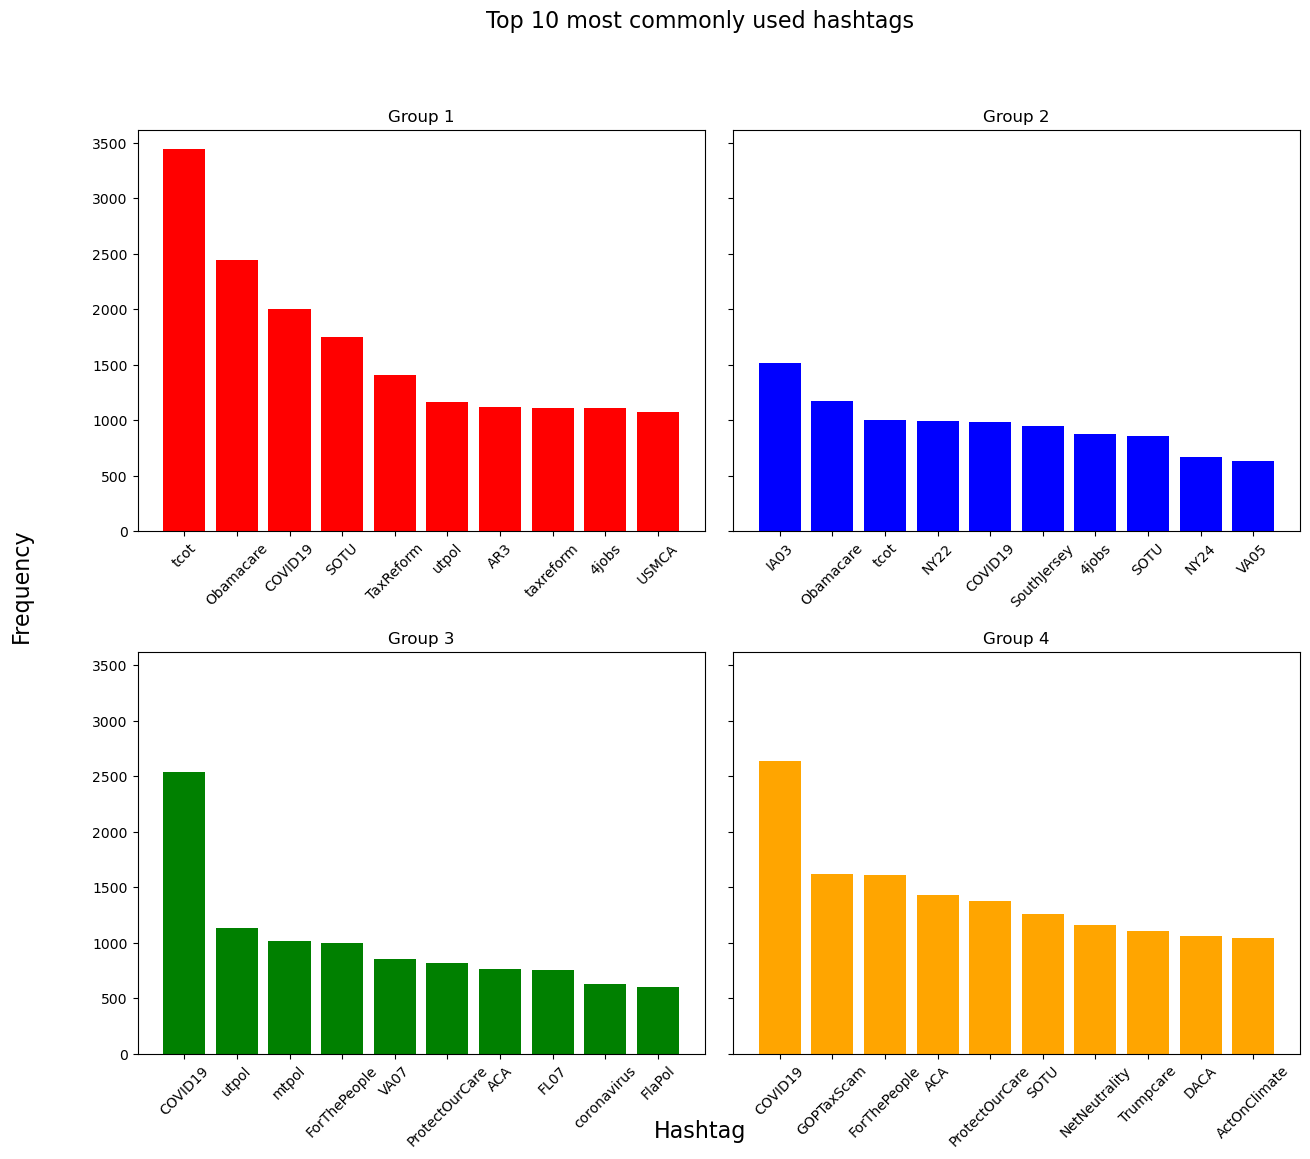

In [17]:
fig, axs = plt.subplots(2, 2, sharey = True, figsize=(15,12))

axs[0,0].bar(top_10_hashtags_group_1, list(sorted_hashtags_group_1_desc.values())[0:10], color='red') 
axs[0,0].set_title('Group 1')
axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)

axs[0,1].bar(top_10_hashtags_group_2, list(sorted_hashtags_group_2_desc.values())[0:10], color='blue') 
axs[0,1].set_title('Group 2')
axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)

axs[1,0].bar(top_10_hashtags_group_3, list(sorted_hashtags_group_3_desc.values())[0:10], color='green') 
axs[1,0].set_title('Group 3')
axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)

axs[1,1].bar(top_10_hashtags_group_4, list(sorted_hashtags_group_4_desc.values())[0:10], color='orange') 
axs[1,1].set_title('Group 4')
axs[1,1].set_xticklabels(top_10_hashtags_group_4, rotation=45)

fig.text(0.5, 0.04, 'Hashtag', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=16)
fig.suptitle('Top 10 most commonly used hashtags', fontsize=16)

plt.tight_layout(rect=[0.2,0.5,0.3,0.7])
plt.subplots_adjust(wspace=0.05, hspace=0.3)

Do you observe any patterns? Are your findings similar to or
different from your findings in part b) ?. Please explain.

Section A : part d)

C:\Users\91989\AppData\Local\Temp\ipykernel_20304\4093721185.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liberal = liberal.append(pd.Series([np.nan] * (len(conservative) - len(liberal))))
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\4093721185.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liberal = liberal.append(pd.Series([np.nan] * (len(conservative) - len(liberal))))
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\4093721185.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liberal = liberal.append(pd.Series([np.nan] * (len(conservative) - len(liberal))))
C:\Users\91989\AppData\Local\Temp\ipykernel_20304\4093721185.py:25: FutureWarning: The series.append method is deprecated and will be remov

<Figure size 1000x800 with 0 Axes>

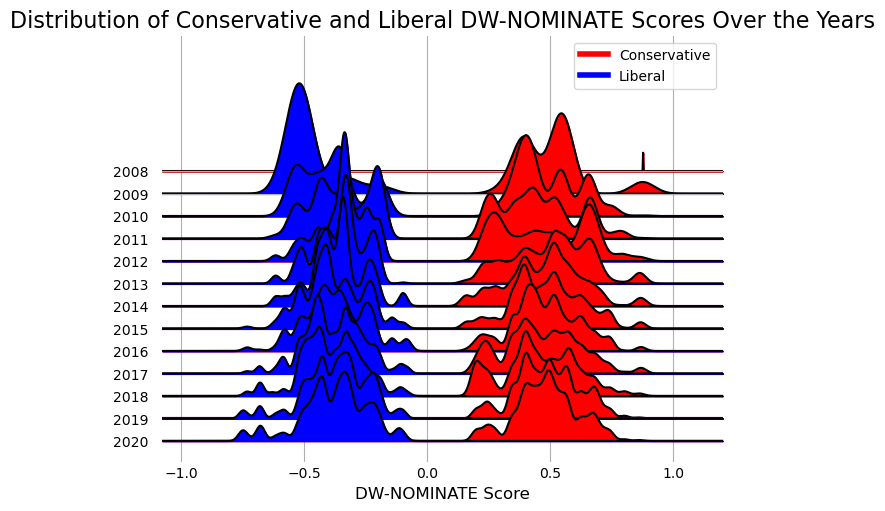

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy

# Step 1: Extract relevant columns and sort by year
df = df_training[['dim1_nominate', 'year']].copy()
df = df.sort_values(by='year')

# Create a new dataframe to store the balanced data
df_balanced = pd.DataFrame()

# Step 2: Split dim1_nominate into two columns based on positive and negative values
# Step 3 & 4: For each year, split, fill NaNs to balance, and combine into a new dataframe
for year in df['year'].unique():
    df_year = df[df['year'] == year]

    # Split into conservative (positive) and liberal (negative)
    conservative = df_year[df_year['dim1_nominate'] > 0]['dim1_nominate']
    liberal = df_year[df_year['dim1_nominate'] <= 0]['dim1_nominate']
    
    # Balance the number of rows between conservative and liberal by adding NaNs
    if len(conservative) > len(liberal):
        # Add NaNs to liberal values to match conservative size
        liberal = liberal.append(pd.Series([np.nan] * (len(conservative) - len(liberal))))
    else:
        # Add NaNs to conservative values to match liberal size
        conservative = conservative.append(pd.Series([np.nan] * (len(liberal) - len(conservative))))
    
    # Create a temporary dataframe with balanced conservative and liberal values
    df_temp = pd.DataFrame({
        'year': [year] * len(conservative),
        'conservative': conservative.values,
        'liberal': liberal.values
    })
    
    # Append to the balanced dataframe
    df_balanced = pd.concat([df_balanced, df_temp], ignore_index=True)

# Step 5: Now we have a balanced dataframe with three columns: year, conservative, liberal

# Step 6: Plot the joyplot (ridge plot) with consistent red and blue colors
plt.figure(figsize=(10, 8))

# Create joyplot for conservatives (red) and liberals (blue)
fig, axes = joypy.joyplot(
    data=df_balanced, by="year", overlap=2, 
    grid=True, fill=True, linecolor="black", 
    color=["red", "blue"]  # Red for conservatives, blue for liberals
)

# Add x-axis label
plt.xlabel("DW-NOMINATE Score", fontsize=12)

# Manually add y-axis label for year
plt.ylabel("Year", fontsize=12)

# Add title
plt.title("Distribution of Conservative and Liberal DW-NOMINATE Scores Over the Years", fontsize=16)

# Create custom legend
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', lw=4, label='Conservative'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Liberal')
], loc='upper right')

# Show the plot
plt.show()


Do you observe any changes over the years? Please explain. Write your findings in the report.

Section A : part e)

In [19]:
# import pandas as pd
# import numpy as np
# from itertools import combinations

# # Extract the two dimensions into a numpy array for distance computation (limiting to 30,000 rows)
# points = df_training[['dim1_nominate', 'dim2_nominate']].to_numpy()

# # Function to calculate Euclidean distance between two points
# def euclidean_distance(point1, point2):
#     return np.sqrt(np.sum((point1 - point2) ** 2))

# # Initialize a list to store only the top 10 most distant pairs
# top_10_distant_pairs = []

# # Iterate over all unique pairs of tweets
# for i, j in combinations(range(len(points)), 2):
#     point1 = points[i]
#     point2 = points[j]
    
#     # Calculate Euclidean distance
#     dist = euclidean_distance(point1, point2)
    
#     # If we have less than 10 pairs, append directly
#     if len(top_10_distant_pairs) < 10:
#         top_10_distant_pairs.append((i, j, dist, df_training.loc[i, 'full_text'], df_training.loc[j, 'full_text']))
#         top_10_distant_pairs.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)
    
#     # If we have 10 pairs already, compare the smallest distance in top-10 with the new distance
#     else:
#         if dist > top_10_distant_pairs[-1][2]:  # Check if the new distance is larger than the smallest in top-10
#             top_10_distant_pairs[-1] = (i, j, dist, df_training.loc[i, 'full_text'], df_training.loc[j, 'full_text'])
#             top_10_distant_pairs.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)

# # Convert the top 10 distant pairs to a DataFrame
# df_top_10_distances = pd.DataFrame(top_10_distant_pairs, columns=['tweet1_index', 'tweet2_index', 'distance', 'tweet1_text', 'tweet2_text'])

# # Display the results
# print("Top-10 most distant tweets along both dimensions:")
# print(df_top_10_distances[['tweet1_text', 'tweet2_text', 'distance']])


In [1]:
print("hello world")

hello world
